In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

In [4]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/TKC /Tugas 2
!ls -a


/content/drive/MyDrive/TKC /Tugas 2
Untitled0.ipynb


In [5]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.8.2


In [6]:
# Import the required modules
from skimage import img_as_float
from skimage import exposure
import plotly.graph_objects as go

import os
import glob
import random
from skimage import io # To preprocess the images
from distutils.file_util import copy_file
import seaborn as sns
import cv2
import keras
from keras.models import load_model
from keras import backend as K
import tensorflow as tf

from skimage.transform import rescale
from keras_preprocessing.image import ImageDataGenerator

import warnings
warnings.simplefilter('ignore')

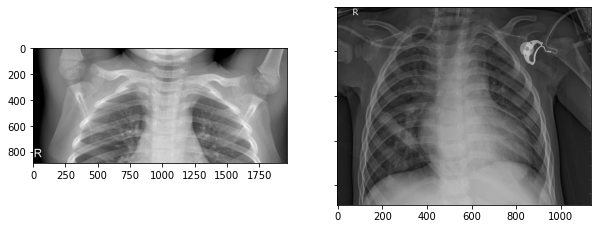

In [8]:
base_dir = '/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray/train'
cls = ['NORMAL', 'PNEUMONIA']

norm_path = os.path.join(base_dir, cls[0], '*')
norm = glob.glob(norm_path)
norm = io.imread(norm[0])

pneu_path = os.path.join(base_dir, cls[1], '*')
pneu = glob.glob(pneu_path)
pneu = io.imread(pneu[0])

f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(10)

axes[0].imshow(norm, cmap='gray')
axes[1].imshow(pneu, cmap='gray')

In [9]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

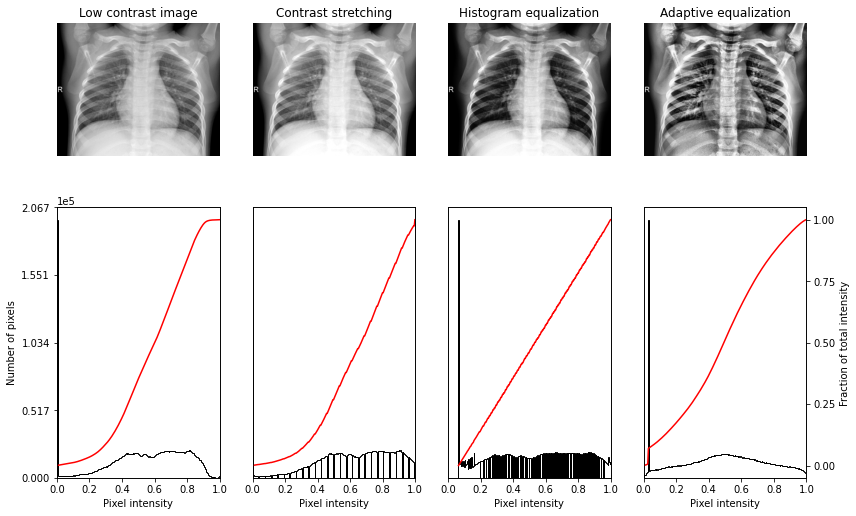

In [10]:
img = norm

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

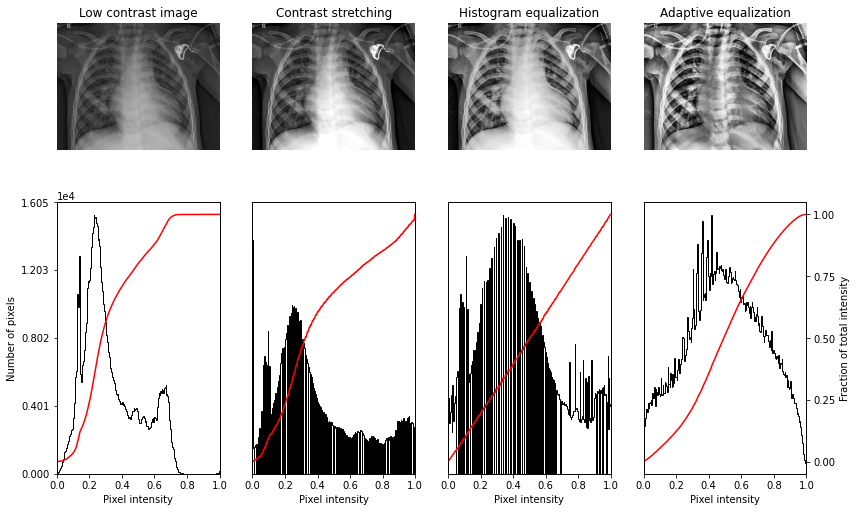

In [11]:
img = pneu

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [12]:
base_dir = '/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray'

train_dir = os.path.join(base_dir, 'train')
norm_train_dir = os.path.join(train_dir, 'NORMAL')
pneu_train_dir = os.path.join(train_dir, 'PNEUMONIA')

val_dir = os.path.join(base_dir, 'test')
norm_val_dir = os.path.join(val_dir, 'NORMAL')
pneu_val_dir = os.path.join(val_dir, 'PNEUMONIA')

In [13]:
base_dir = '/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray'

train_dir = os.path.join(base_dir, 'train')
norm_train_dir = os.path.join(train_dir, 'NORMAL')
pneu_train_dir = os.path.join(train_dir, 'PNEUMONIA')

val_dir = os.path.join(base_dir, 'test')
norm_val_dir = os.path.join(val_dir, 'NORMAL')
pneu_val_dir = os.path.join(val_dir, 'PNEUMONIA')

In [15]:
print("Total Training NORMAL:", len(os.listdir(norm_train_dir)))
print("Total Training PNEUMONIA:", len(os.listdir(pneu_train_dir)))
print()
print("Total validation NORMAL:", len(os.listdir(norm_val_dir)))
print("Total validation PNEUMONIA:", len(os.listdir(pneu_val_dir)))

Total Training NORMAL: 1341
Total Training PNEUMONIA: 3875

Total validation NORMAL: 234
Total validation PNEUMONIA: 390


In [14]:
def gather_data(data_dir):
    dir_data = []
    dir_label = []

    for dirpath, dirnames, filenames in os.walk(data_dir):
        for file in filenames:
            if ".jpeg" in file:
                image_path = os.path.join(dirpath, file)

                image = cv2.imread(image_path)
                image = cv2.resize(image, (150,150))
                image = image.astype('float32') / 255.0
                dir_data.append(image)

                label = int((image_path.split(os.path.sep)[-2]) == 'PNEUMONIA')
                dir_label.append(label)

    dir_data = np.array(dir_data)
    dir_label = np.array(dir_label)

    return dir_data, dir_label

In [16]:
x_train, y_train = gather_data(train_dir)
x_val, y_val = gather_data(val_dir)

In [22]:
%cd /content/drive/MyDrive/TKC /Tugas 2

/content/drive/MyDrive/TKC /Tugas 2


In [23]:
!mkdir GatherData

In [20]:
gather_save = '/content/drive/MyDrive/TKC /Tugas 2/GatherData'

In [24]:
preprocessed_data = [x_train, y_train, x_val, y_val]
preprocessed_file_name = ['x_train', 'y_train', 'x_val', 'y_val']
for i, file_name in enumerate(preprocessed_file_name):
    np.save(gather_save + '/' + file_name + '.npy', preprocessed_data[i])

In [25]:

import numpy as np

In [26]:
x_train = np.load(gather_save + '/x_train.npy')
y_train = np.load(gather_save + '/y_train.npy')

x_val = np.load(gather_save + '/x_val.npy')
y_val = np.load(gather_save + '/y_val.npy')

In [27]:
print("Train Data = ", x_train.shape)
print("Train Label = ", y_train.shape)
print()
print("Val Data = ", x_val.shape)
print("Val Label = ", y_val.shape)

Train Data =  (5216, 150, 150, 3)
Train Label =  (5216,)

Val Data =  (624, 150, 150, 3)
Val Label =  (624,)


In [28]:
from skimage.io import imread
from skimage.transform import resize

In [29]:
def conv_block(filters):
    block = Sequential([
        SeparableConv2D(filters, 3, activation='relu', padding='same'),
        SeparableConv2D(filters, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D()
    ])
    
    return block

In [30]:
def dense_block(units, dropout_rate):
    block = Sequential([
        Dense(units, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate)
    ])
    
    return block

In [31]:
def build_model():
    model = Sequential([
        Input(shape=(150, 150, 3)),

        Conv2D(16, 3, activation='relu', padding='same'),
        Conv2D(16, 3, activation='relu', padding='same'),
        MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        conv_block(128),
        
        Dropout(0.2),
        
        conv_block(256),
        
        Dropout(0.2),
        Flatten(),
        
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        Dense(1, activation='sigmoid')
    ])
    
    return model

In [96]:
%cd /content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray
!ls

/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray
chest_xray  data  __MACOSX  test  test1  train	train1	val


In [97]:
%cp -av test/ testcopy

'test/' -> 'testcopy'
'test/NORMAL' -> 'testcopy/NORMAL'
'test/NORMAL/IM-0001-0001.jpeg' -> 'testcopy/NORMAL/IM-0001-0001.jpeg'
'test/NORMAL/IM-0003-0001.jpeg' -> 'testcopy/NORMAL/IM-0003-0001.jpeg'
'test/NORMAL/IM-0005-0001.jpeg' -> 'testcopy/NORMAL/IM-0005-0001.jpeg'
'test/NORMAL/IM-0006-0001.jpeg' -> 'testcopy/NORMAL/IM-0006-0001.jpeg'
'test/NORMAL/IM-0007-0001.jpeg' -> 'testcopy/NORMAL/IM-0007-0001.jpeg'
'test/NORMAL/IM-0009-0001.jpeg' -> 'testcopy/NORMAL/IM-0009-0001.jpeg'
'test/NORMAL/IM-0010-0001.jpeg' -> 'testcopy/NORMAL/IM-0010-0001.jpeg'
'test/NORMAL/IM-0011-0001-0001.jpeg' -> 'testcopy/NORMAL/IM-0011-0001-0001.jpeg'
'test/NORMAL/IM-0011-0001-0002.jpeg' -> 'testcopy/NORMAL/IM-0011-0001-0002.jpeg'
'test/NORMAL/IM-0011-0001.jpeg' -> 'testcopy/NORMAL/IM-0011-0001.jpeg'
'test/NORMAL/IM-0013-0001.jpeg' -> 'testcopy/NORMAL/IM-0013-0001.jpeg'
'test/NORMAL/IM-0015-0001.jpeg' -> 'testcopy/NORMAL/IM-0015-0001.jpeg'
'test/NORMAL/IM-0016-0001.jpeg' -> 'testcopy/NORMAL/IM-0016-0001.jpeg'


In [98]:
%cd /content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray
%cp -av train/ traincopy

Streaming output truncated to the last 5000 lines.
'train/NORMAL/IM-0712-0001.jpeg' -> 'traincopy/NORMAL/IM-0712-0001.jpeg'
'train/NORMAL/IM-0713-0001.jpeg' -> 'traincopy/NORMAL/IM-0713-0001.jpeg'
'train/NORMAL/IM-0714-0001.jpeg' -> 'traincopy/NORMAL/IM-0714-0001.jpeg'
'train/NORMAL/IM-0715-0001.jpeg' -> 'traincopy/NORMAL/IM-0715-0001.jpeg'
'train/NORMAL/IM-0716-0001.jpeg' -> 'traincopy/NORMAL/IM-0716-0001.jpeg'
'train/NORMAL/IM-0717-0001.jpeg' -> 'traincopy/NORMAL/IM-0717-0001.jpeg'
'train/NORMAL/IM-0718-0001.jpeg' -> 'traincopy/NORMAL/IM-0718-0001.jpeg'
'train/NORMAL/IM-0719-0001.jpeg' -> 'traincopy/NORMAL/IM-0719-0001.jpeg'
'train/NORMAL/IM-0721-0001.jpeg' -> 'traincopy/NORMAL/IM-0721-0001.jpeg'
'train/NORMAL/IM-0722-0001.jpeg' -> 'traincopy/NORMAL/IM-0722-0001.jpeg'
'train/NORMAL/IM-0724-0001.jpeg' -> 'traincopy/NORMAL/IM-0724-0001.jpeg'
'train/NORMAL/IM-0727-0001.jpeg' -> 'traincopy/NORMAL/IM-0727-0001.jpeg'
'train/NORMAL/IM-0728-0001.jpeg' -> 'traincopy/NORMAL/IM-0728-0001.jpeg'


In [99]:
%cd /content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray

/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray


In [73]:
%mkdir data
%cd data
%mkdir normal && mkdir pneumonia

/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray/data


In [101]:
#move all images

#normal
%mv testcopy/NORMAL/* data/normal
%mv traincopy/NORMAL/* data/normal

#pneu
%mv traincopy/PNEUMONIA/* data/pneumonia
%mv testcopy/PNEUMONIA/* data/pneumonia

In [104]:
base_dir = '/content/drive/MyDrive/TKC /Tugas 1/chest_xray_dataset/chest_xray/data'

In [107]:
norm_dir = os.path.join(base_dir, 'normal')
pneu_dir = os.path.join(base_dir, 'pneumonia')

print("Total Training NORMAL:", len(os.listdir(norm_dir)))
print("Total Training PNEUMONIA:", len(os.listdir(pneu_dir)))

Total Training NORMAL: 1575
Total Training PNEUMONIA: 4265


In [108]:

norm_data_count = len(os.listdir(norm_dir))
pneu_data_count = len(os.listdir(pneu_dir))

print(f"Jumlah Normal: {norm_data_count}\nJumlah Pneoumonia: {pneu_data_count}")

Jumlah Normal: 1575
Jumlah Pneoumonia: 4265


In [109]:
weight_for_0 = (1 / norm_data_count) * (x_train.shape[0]) / 2.0 
weight_for_1 = (1 / pneu_data_count) * (x_train.shape[0]) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.66
Weight for class 1: 0.61


In [110]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPool2D, SeparableConv2D
from tensorflow.keras.metrics import Precision, Recall

In [111]:
model = build_model()

METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
]
    
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
)

In [112]:
BATCH_SIZE = 128
EPOCH = 25

In [113]:
TRAIN_IMG_COUNT = x_train.shape[0]
VAL_IMG_COUNT = x_val.shape[0]

In [114]:
history = model.fit(x_train, y_train,
              steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
              epochs=EPOCH,
              validation_data=(x_val, y_val),
              validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
              class_weight=class_weight,
              )

Epoch 1/25
40/40 [==============================] - 30s 375ms/step - loss: 0.4046 - accuracy: 0.7745 - precision: 0.9506 - recall: 0.7347 - val_loss: 0.6621 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 2/25
40/40 [==============================] - 12s 294ms/step - loss: 0.1858 - accuracy: 0.9206 - precision: 0.9824 - recall: 0.9094 - val_loss: 0.8235 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/25
40/40 [==============================] - 12s 305ms/step - loss: 0.1252 - accuracy: 0.9486 - precision: 0.9836 - recall: 0.9466 - val_loss: 1.1384 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/25
40/40 [==============================] - 12s 300ms/step - loss: 0.1030 - accuracy: 0.9634 - precision: 0.9868 - recall: 0.9636 - val_loss: 1.2965 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/25
40/40 [==============================] - 12s 297ms/step - loss: 0.1009 - accuracy: 0.9605

In [115]:

import json
target_dir = '/content/drive/MyDrive/TKC /Tugas 2'

In [116]:
history_dict = history.history
json.dump(history_dict, open(target_dir + '/train_model_history_ke1.json', 'w'))

model.save(target_dir + '/train_model_ke1.h5')
model.save_weights(target_dir + '/train_model_weights_ke1.h5')

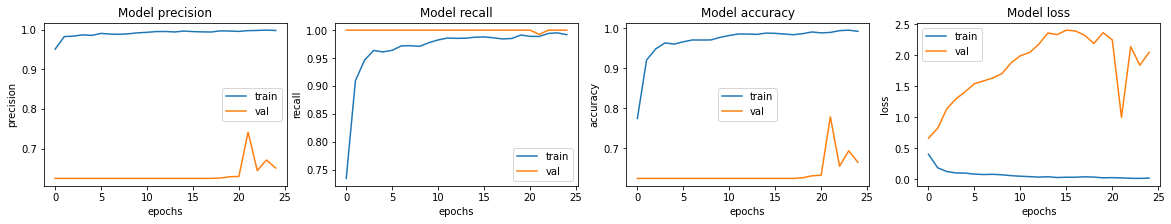

In [117]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [118]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
save_dir = target_dir

checkpoint_cb = ModelCheckpoint(save_dir + "/best_model_tuning.h5",
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=25,
                                  restore_best_weights=True)

In [119]:
EPOCH = 100

In [120]:
 from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
 def exponential_decay(lr0, s):
     def exponential_decay_fn(epoch):
         return lr0 * 0.1 **(epoch / s)
     return exponential_decay_fn

 exponential_decay_fn = exponential_decay(0.01, 20)

 lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [121]:
history = model.fit(x_train, y_train,
              steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
              epochs=EPOCH,
              validation_data=(x_val, y_val),
              validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
              class_weight=class_weight,
              callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
              )

Epoch 1/100
40/40 [==============================] - 13s 321ms/step - loss: 0.1774 - accuracy: 0.9308 - precision: 0.9769 - recall: 0.9288 - val_loss: 2873.2852 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0100
Epoch 2/100
40/40 [==============================] - 12s 313ms/step - loss: 0.1346 - accuracy: 0.9410 - precision: 0.9803 - recall: 0.9394 - val_loss: 137.8864 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0089
Epoch 3/100
40/40 [==============================] - 13s 316ms/step - loss: 0.0962 - accuracy: 0.9601 - precision: 0.9867 - recall: 0.9592 - val_loss: 13.5326 - val_accuracy: 0.3926 - val_precision: 1.0000 - val_recall: 0.0282 - lr: 0.0079
Epoch 4/100
40/40 [==============================] - 12s 311ms/step - loss: 0.0906 - accuracy: 0.9622 - precision: 0.9875 - recall: 0.9613 - val_loss: 0.7993 - val_accuracy: 0.8045 - val_precision: 0.9379 - val_recall: 0.7359 - lr: 0.0071
Epoch 5/100
40/40 [===

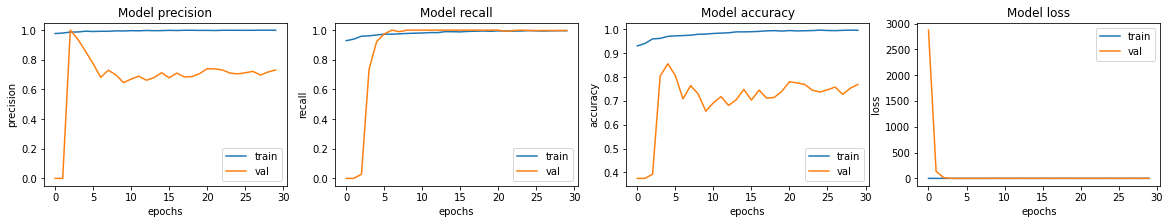

In [122]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [123]:
model = load_model(target_dir + '/train_model_ke1.h5')


In [124]:
loss, acc, prec, rec = model.evaluate(x_val, y_val)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

20/20 [==============================] - 1s 23ms/step - loss: 2.0447 - accuracy: 0.6651 - precision: 0.6511 - recall: 1.0000
Accuracy = 66.51 %
Precision = 65.11 %
Recall = 100.00 %


In [125]:
model = load_model(target_dir + '/best_model_tuning.h5')

In [126]:
#train
loss, acc, prec, rec = model.evaluate(x_train, y_train)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

163/163 [==============================] - 3s 14ms/step - loss: 0.3685 - accuracy: 0.8967 - precision: 0.9997 - recall: 0.8612
Accuracy = 89.67 %
Precision = 99.97 %
Recall = 86.12 %


In [127]:
#test
loss, acc, prec, rec = model.evaluate(x_val, y_val)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

20/20 [==============================] - 1s 15ms/step - loss: 0.5426 - accuracy: 0.8558 - precision: 0.8571 - recall: 0.9231
Accuracy = 85.58 %
Precision = 85.71 %
Recall = 92.31 %
